In [1]:
import numpy as np 
import pandas as pd

In [4]:
n = 100 # 데이터 포인트 수 
ar_params = [0.7] # 자기회귀 계수 
ma_params = [] # 이동평균 계수 
residuals = np.random.normal(0,1, n) # 전차 생성 

# AR(1) 모델 생성 
data = [0] # 초기값 설정 
for i in range(1, n) : 
    data.append(ar_params[0] * data[i-1] + residuals[i])

# 데이터 프레임 생성 
df = pd.DataFrame({
    'Date' : pd.date_range(start='2023-01-01', periods=n, freq='D'),
    'Value' : data
})

print(df)

         Date     Value
0  2023-01-01  0.000000
1  2023-01-02 -0.019611
2  2023-01-03  0.767833
3  2023-01-04  0.864750
4  2023-01-05  1.184210
..        ...       ...
95 2023-04-06 -1.324728
96 2023-04-07 -0.040080
97 2023-04-08 -0.038915
98 2023-04-09  3.143870
99 2023-04-10  0.401928

[100 rows x 2 columns]


In [5]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf

                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -150.439
Method:               Conditional MLE   S.D. of innovations              1.106
Date:                Wed, 31 May 2023   AIC                            306.877
Time:                        17:17:39   BIC                            314.662
Sample:                             1   HQIC                           310.027
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0107      0.111      0.096      0.924      -0.207       0.229
Value.L1       0.7222      0.070     10.384      0.000       0.586       0.859
                                    Roots           

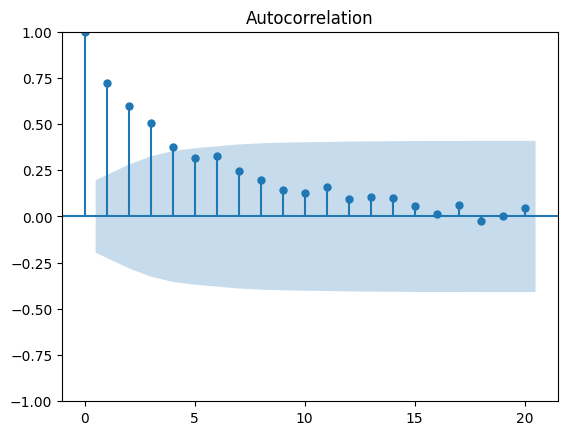

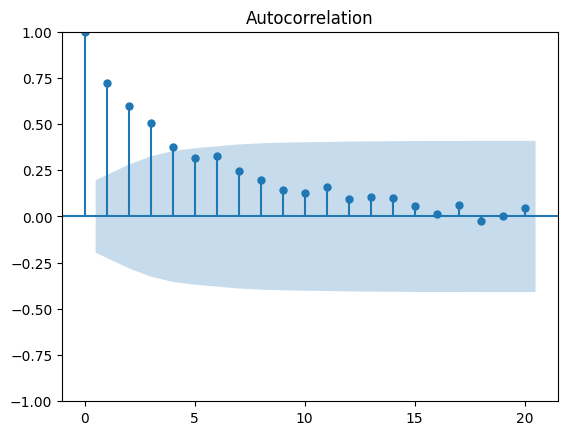

In [6]:
# AR (1) 모델 적합 
model = AutoReg(df['Value'], lags=1)
results = model.fit()

# 모델 정보 출력 
print(results.summary())

# ACF 그래프 출력 
plot_acf(df['Value'], lags=20)